In [1]:
import numpy as np
import pandas as pd
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from sklearn.preprocessing import scale
from pyclustertend import hopkins, vat, ivat
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/home/AD/tsainbur/anaconda3/envs/py19/lib/python3.6/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
datasets = list(DATA_DIR.glob('embeddings/*/*.pickle'))
len(datasets)

25

In [3]:
def remove_outliers(z, pct = 99.5):
    _min = np.percentile(z, (100-pct), axis=0)
    _max = np.percentile(z, pct, axis=0)
    for col in range(np.shape(z)[1]):
        mask = z[:,col] < _min[col]
        z[mask,col] = _min[col]
        mask = z[:,col] > _max[col]
        z[mask,col] = _max[col]
    return z

/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/castellucci_mouse_usv_segmented/VOC592.pickle (4101, 2)


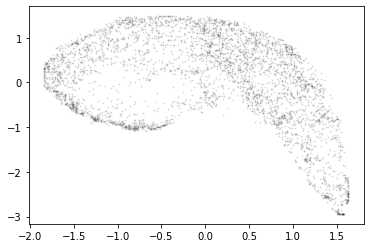

/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/castellucci_mouse_usv_segmented/VOC591.pickle (7856, 2)


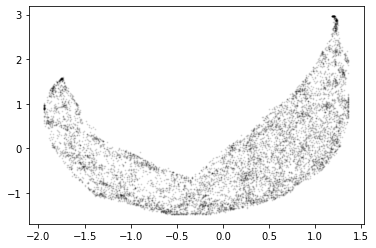

/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/castellucci_mouse_usv_segmented/VOC597.pickle (1575, 2)


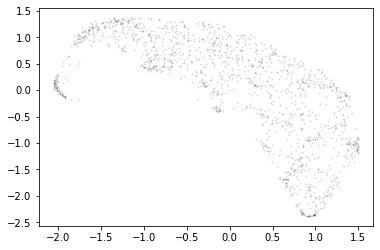

/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/castellucci_mouse_usv_segmented/VOC594.pickle (8302, 2)


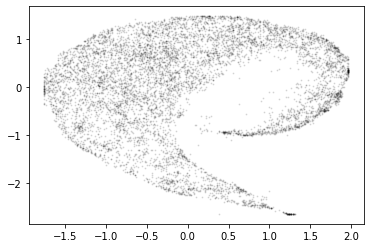

/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/BIRD_DB_Vireo_cassinii/full.pickle (67032, 2)


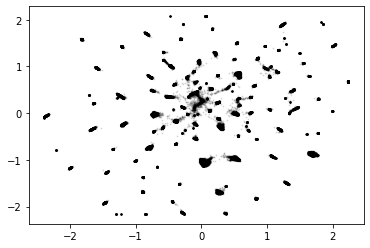

/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/gibbon_morita_segmented/full.pickle (9220, 2)


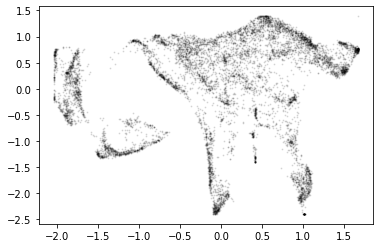

/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/bengalese_finch_sober/or60yw70.pickle (35799, 2)


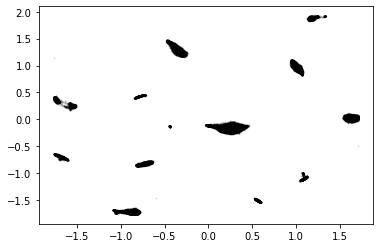

/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/bengalese_finch_sober/gr41rd51.pickle (52788, 2)


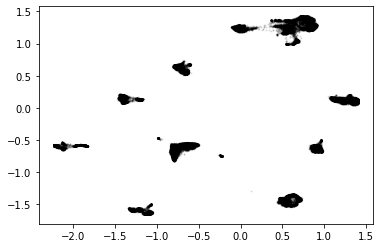

/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/bengalese_finch_sober/bl26lb16.pickle (70701, 2)


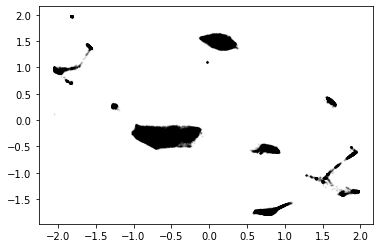

/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/bengalese_finch_sober/gy6or6.pickle (56375, 2)


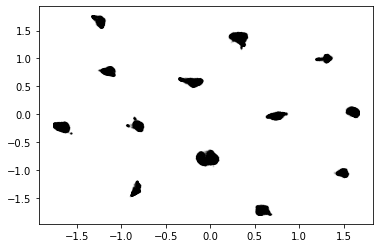

/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/buckeye/human_full.pickle (837207, 2)


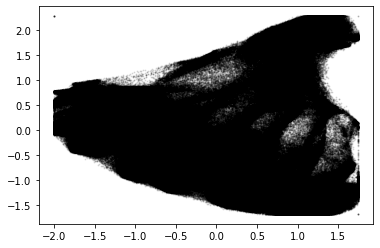

/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/swamp_sparrow/full.pickle (97573, 2)


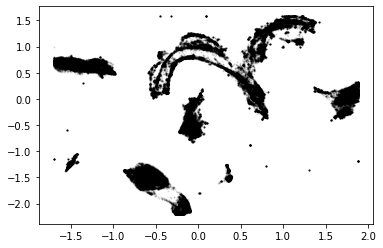

/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/mobysound_humpback_whale/full.pickle (2310, 2)


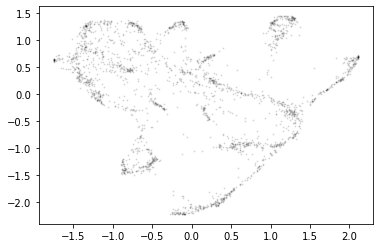

/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/koumura_bengalese_finch/Bird4.pickle (26891, 2)


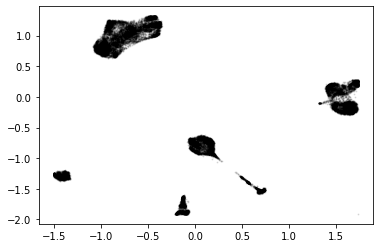

/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/koumura_bengalese_finch/Bird3.pickle (29470, 2)


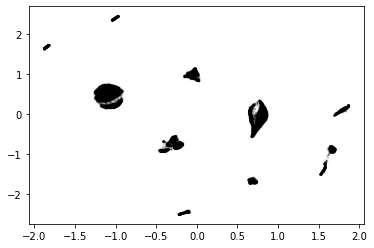

/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/koumura_bengalese_finch/Bird1.pickle (35606, 2)


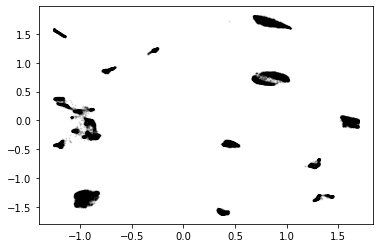

/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/koumura_bengalese_finch/Bird10.pickle (5743, 2)


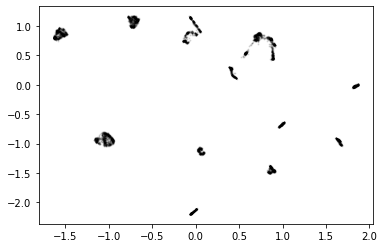

/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/koumura_bengalese_finch/Bird9.pickle (19541, 2)


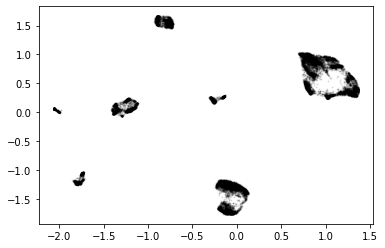

/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/koumura_bengalese_finch/Bird6.pickle (17653, 2)


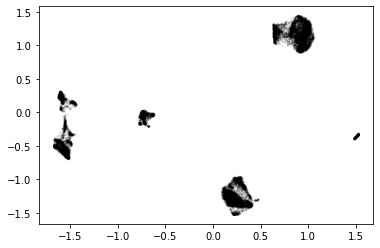

/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/koumura_bengalese_finch/Bird5.pickle (20525, 2)


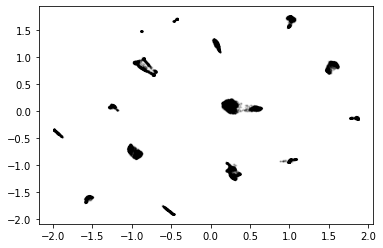

/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/koumura_bengalese_finch/Bird0.pickle (7652, 2)


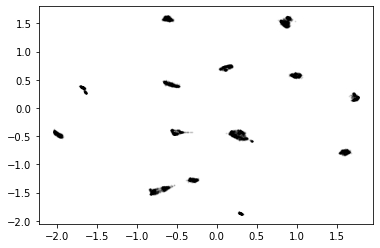

/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/koumura_bengalese_finch/Bird8.pickle (4985, 2)


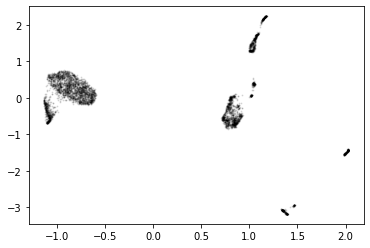

/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/koumura_bengalese_finch/Bird2.pickle (26127, 2)


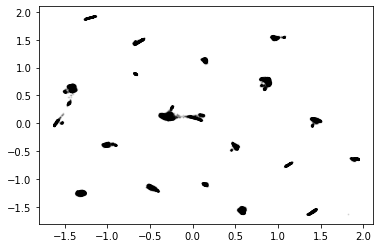

/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/koumura_bengalese_finch/Bird7.pickle (20722, 2)


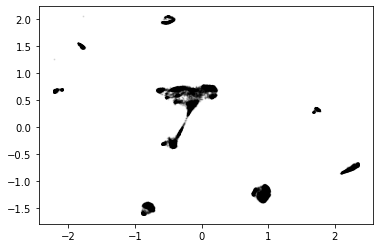

/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/giant_otter/full.pickle (453, 2)


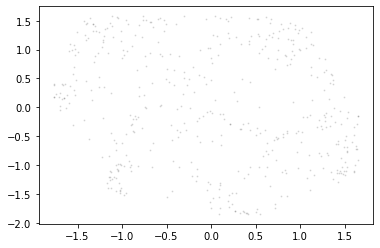

In [19]:
clusterability_df = pd.DataFrame(columns=[
    'df', 'dataset', 'indv', 'hopkins_10', 'hopkins_100', 'hopkins_pct_0.1',
    'hopkins_pct_1', 'hopkins_pct_5', 'hopkins_pct_10'
])
for dataset in tqdm(datasets):
    umap_proj = np.vstack(pd.read_pickle(dataset)[['umap']].umap.values)
    umap_proj = remove_outliers(umap_proj, pct=99.5)
    umap_proj = scale(umap_proj)
    print(dataset, np.shape(umap_proj))
    fig, ax = plt.subplots()
    ax.scatter(umap_proj[:, 0], umap_proj[:, 1], s=1, color='k', alpha=0.1)
    plt.show()

    hopkins_dict = {
        'abs': {
            10: hopkins(umap_proj, 10),
            100: hopkins(umap_proj, 100)
        },
        'pct': {
            0.1: hopkins(umap_proj,
                         int(np.ceil(len(umap_proj) * (0.1 / 100)))),
            1: hopkins(umap_proj, int(np.ceil(len(umap_proj) * (1 / 100)))),
            5: hopkins(umap_proj, int(np.ceil(len(umap_proj) * (5 / 100)))),
            10: hopkins(umap_proj, int(np.ceil(len(umap_proj) * (10 / 100))))
        }
    }

    clusterability_df.loc[len(clusterability_df)] = [
        dataset, dataset.parent.stem, dataset.stem, hopkins_dict['abs'][10], hopkins_dict['abs'][100],
        hopkins_dict['pct'][0.1], hopkins_dict['pct'][1], hopkins_dict['pct'][5], hopkins_dict['pct'][10]
    ]

In [31]:
species_dict = {
    'castellucci_mouse_usv_segmented': {
        'species': 'Mouse',
        'group': 'mammal'
    },
    'BIRD_DB_Vireo_cassinii': {
        'species': 'Cassin\'s vireo',
        'group': 'songbird'
    },
    'gibbon_morita_segmented': {
        'species': 'Gibbon',
        'group': 'mammal'
    },
    'bengalese_finch_sober': {
        'species': 'Bengalese finch',
        'group': 'songbird'
    },
    'buckeye': {
        'species': 'Human (English)',
        'group': 'mammal'
    },
    'swamp_sparrow': {
        'species': 'Swamp sparrow',
        'group': 'songbird'
    },
    'mobysound_humpback_whale': {
        'species': 'Humpback whale',
        'group': 'mammal'
    },
    'koumura_bengalese_finch': {
        'species': 'Bengalese finch',
        'group': 'songbird'
    },
    'giant_otter': {
        'species': 'Giant otter',
        'group': 'mammal'
    },
}

In [35]:
clusterability_df['species'] = [species_dict[ds]['species']  for ds in clusterability_df['dataset'].values]
clusterability_df['family'] = [species_dict[ds]['group']  for ds in clusterability_df['dataset'].values]

In [36]:
clusterability_df

,df,dataset,indv,hopkins_10,hopkins_100,hopkins_pct_0.1,hopkins_pct_1,hopkins_pct_5,hopkins_pct_10,species,family
0,/local/home/tsainbur/github_repos/avgn_paper/d...,castellucci_mouse_usv_segmented,VOC592,0.061921,0.057771,0.111886,0.053858,0.050929,0.056141,Mouse,mammal
1,/local/home/tsainbur/github_repos/avgn_paper/d...,castellucci_mouse_usv_segmented,VOC591,0.055930,0.032916,0.022035,0.032986,0.028728,0.034569,Mouse,mammal
2,/local/home/tsainbur/github_repos/avgn_paper/d...,castellucci_mouse_usv_segmented,VOC597,0.037199,0.065784,0.144604,0.049771,0.057810,0.069043,Mouse,mammal
3,/local/home/tsainbur/github_repos/avgn_paper/d...,castellucci_mouse_usv_segmented,VOC594,0.227091,0.100077,0.050211,0.063151,0.090886,0.087845,Mouse,mammal
4,/local/home/tsainbur/github_repos/avgn_paper/d...,BIRD_DB_Vireo_cassinii,full,0.004231,0.004845,0.008320,0.004320,0.004416,0.004558,Cassin's vireo,songbird
5,/local/home/tsainbur/github_repos/avgn_paper/d...,gibbon_morita_segmented,full,0.097181,0.056454,0.056750,0.066235,0.056999,0.052468,Gibbon,mammal
6,/local/home/tsainbur/github_repos/avgn_paper/d...,bengalese_finch_sober,or60yw70,0.004131,0.003589,0.002885,0.003413,0.003283,0.003436,Bengalese finch,songbird
7,/local/home/tsainbur/github_repos/avgn_paper/d...,bengalese_finch_sober,gr41rd51,0.003247,0.003513,0.004260,0.003008,0.003323,0.003300,Bengalese finch,songbird
8,/local/home/tsainbur/github_repos/avgn_paper/d...,bengalese_finch_sober,bl26lb16,0.002457,0.002774,0.002275,0.002758,0.002867,0.002807,Bengalese finch,songbird
9,/local/home/tsainbur/github_repos/avgn_paper/d...,bengalese_finch_sober,gy6or6,0.002387,0.003476,0.003009,0.003310,0.003377,0.003258,Bengalese finch,songbird


In [7]:
import seaborn as sns

In [42]:
result

,species,family,hopkins_pct_10
0,Bengalese finch,songbird,0.003978
1,Cassin's vireo,songbird,0.004558
7,Swamp sparrow,songbird,0.007644
4,Human (English),mammal,0.014939
3,Gibbon,mammal,0.052468
6,Mouse,mammal,0.062592
5,Humpback whale,mammal,0.077861
2,Giant otter,mammal,0.311424


,species,family,hopkins_pct_10
0,Bengalese finch,songbird,0.003978
1,Cassin's vireo,songbird,0.004558
7,Swamp sparrow,songbird,0.007644
4,Human (English),mammal,0.014939
3,Gibbon,mammal,0.052468
6,Mouse,mammal,0.062592
5,Humpback whale,mammal,0.077861
2,Giant otter,mammal,0.311424


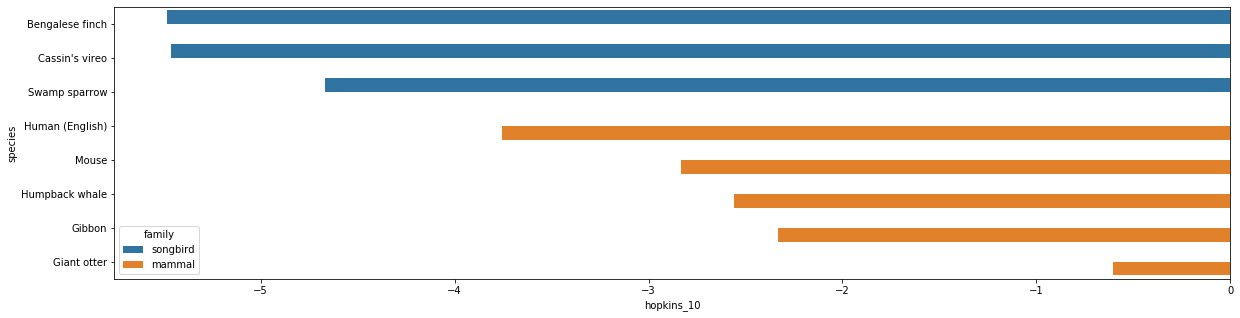

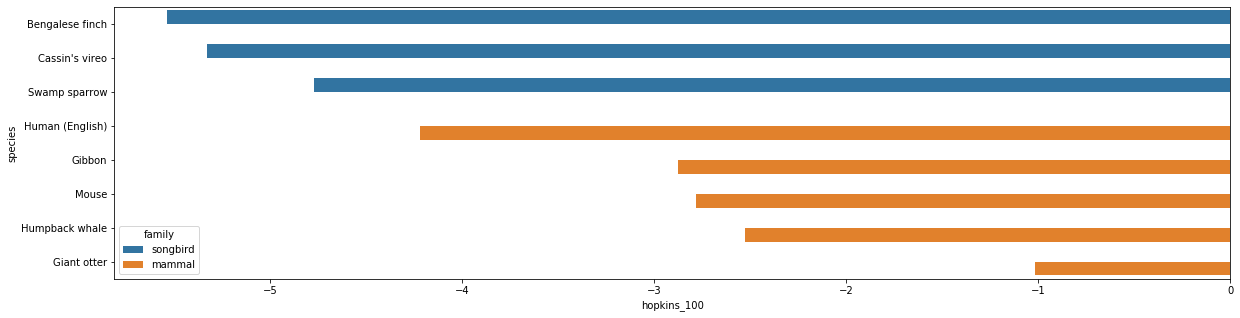

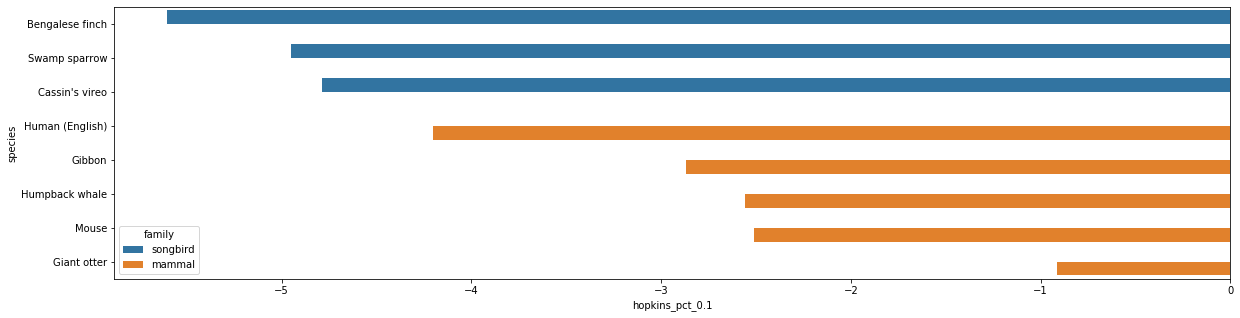

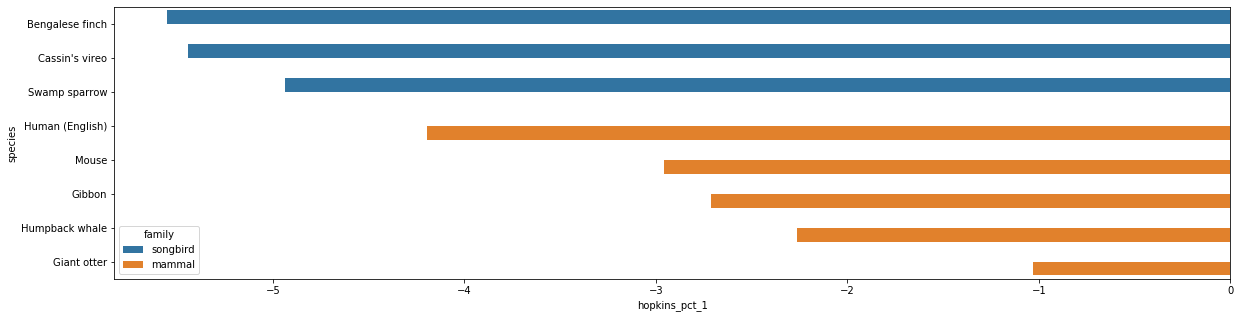

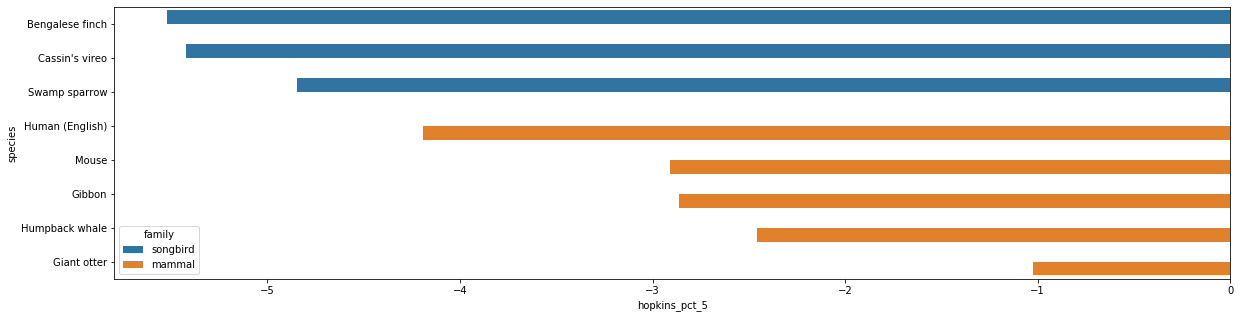

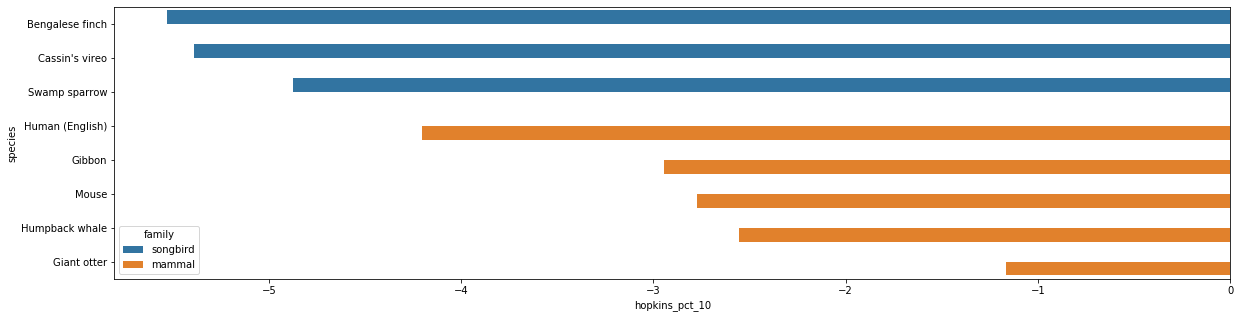

In [49]:
for metric in ['hopkins_10','hopkins_100','hopkins_pct_0.1','hopkins_pct_1','hopkins_pct_5','hopkins_pct_10']:
    fig, ax = plt.subplots(figsize=(20,5))
    result = clusterability_df.groupby(["species", 'family'])[metric].aggregate(np.median).reset_index().sort_values(metric)
    result[metric] = np.log(result[metric])
    sns.barplot(x=metric,
                y="species",
                hue='family',
                data=result,
                ax=ax,
                #linewidth=2.5,
               order=result['species'])
    
    plt.show()